In [1]:
import os 

# Set the working directory to the root of the project
# os.chdir(r'C:\Users\jespe\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam') # Desktop
# os.chdir(r"C:\Users\Jesper\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam") # Laptop
print("Current working directory:", os.getcwd()) 

Current working directory: C:\Users\jespe\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold

from classification_functions import *

# Question 2

In [3]:
# import dataset
df_raw_dataset = pd.read_csv(os.path.join('data', 'data_raw.txt'), sep='\t')

num_samples, num_features = df_raw_dataset.iloc[:,1:].shape
df_raw_dataset.columns = ['class'] + [f'feature {i}' for i in range(1, num_features+1)]
num_classes = len(df_raw_dataset['class'].unique())

print(f'Number of samples: {num_samples}')
print(f'Number of features: {num_features}')
print(f'Number of classes: {num_classes}')
 
print("\nFirst 5 rows of the raw dataset:")
df_raw_dataset.head()

Number of samples: 5000
Number of features: 1000
Number of classes: 4

First 5 rows of the raw dataset:


,class,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 991,feature 992,feature 993,feature 994,feature 995,feature 996,feature 997,feature 998,feature 999,feature 1000
1,2,-1000.000000,0.493852,-0.097408,1.067132,-0.067073,-1000.000000,-0.279775,-0.615191,0.607782,...,0.324266,-1.176896,0.881978,0.954489,1.096337,0.443422,0.472010,-1.004938,1.813586,0.355279
2,1,0.146618,-0.843381,0.084083,-1.319645,-0.796130,-0.746654,2.162536,0.661785,-2.026639,...,-1.224754,-0.052719,-1.933023,0.756493,-0.801447,0.535718,0.927770,0.031396,1.388040,0.243790
3,2,-1.986901,-0.099954,0.974906,0.588525,-0.468599,-1.741473,1.122659,-0.498773,0.821948,...,0.175280,1.733996,0.504883,0.030797,-1.067338,-0.407298,0.470651,1.710230,1.549639,3.009124
4,4,0.789259,2.447201,1.200830,1.889460,0.654227,0.065656,-1000.000000,-0.792071,0.013415,...,1.511587,0.369627,0.507842,-0.107906,-1.024276,1.685745,-1000.000000,-0.173979,0.701901,-1.652574
5,4,-0.906112,0.377205,-1.073484,0.598118,-1.497231,-0.097904,-1.343775,-0.064006,-0.607471,...,-0.276598,0.946726,0.246329,-0.088163,0.480801,0.147565,0.724213,-1.113153,-1.081732,-1.033888


## 2a) Investigate distribution of missing values

Investigate the missing value distribution in the data set.

Summarize your findings and discuss risks, if any, you see with dropping observations from the data set if any features for that observation contain missing values.

On the small, clean, data set you used for Question 1 (after dropping observations), mimic at least one missing value distribution/source you observed on the full data set, i.e., generate even more missing values according to the same distribution you detected on the full data set. How is classification performance affected if you drop the observations with missing values generated by you according to the detected mechanism?

In [4]:
df_raw_dataset = df_raw_dataset.replace(-1000, np.nan)

df_dropna = df_raw_dataset.dropna() # drop rows with NaN values

num_samples_dropna, num_features_dropna = df_dropna.iloc[:,1:].shape
print(f'Number of samples (dropna): {num_samples_dropna}')
print(f'Number of samples dropped: {num_samples - num_samples_dropna}')
print(f'Number of features (dropna): {num_features_dropna}') 

print("\nFirst 5 rows of the dataset without missing values:")
df_dropna.head()

Number of samples (dropna): 2020
Number of samples dropped: 2980
Number of features (dropna): 1000

First 5 rows of the dataset without missing values:


,class,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 991,feature 992,feature 993,feature 994,feature 995,feature 996,feature 997,feature 998,feature 999,feature 1000
2,1,0.146618,-0.843381,0.084083,-1.319645,-0.796130,-0.746654,2.162536,0.661785,-2.026639,...,-1.224754,-0.052719,-1.933023,0.756493,-0.801447,0.535718,0.927770,0.031396,1.388040,0.243790
3,2,-1.986901,-0.099954,0.974906,0.588525,-0.468599,-1.741473,1.122659,-0.498773,0.821948,...,0.175280,1.733996,0.504883,0.030797,-1.067338,-0.407298,0.470651,1.710230,1.549639,3.009124
7,1,-1.961148,-2.066390,1.157878,2.638431,0.380795,-1.135741,1.407938,0.641110,-0.257362,...,1.388097,0.940432,-3.248729,-1.056628,0.526422,-0.141712,-0.243878,2.261639,-0.178581,0.717398
9,3,-0.288366,1.755972,-1.144203,0.321466,1.399391,0.854409,-1.334523,-0.673844,-0.706075,...,-1.339229,-0.997101,-0.565771,2.662074,-0.520536,0.371094,-0.182359,-2.124540,-0.127067,-0.273763
10,3,2.504740,0.144209,2.255337,0.306778,1.239686,-0.452261,0.057692,1.508914,0.124645,...,1.096542,-0.198090,-0.855567,-0.923564,-0.994823,-1.253920,0.359540,-0.418368,0.423453,1.433150


Distribution of the the missing values

Number of missing values per class:
1    964
2    646
3    384
4    986


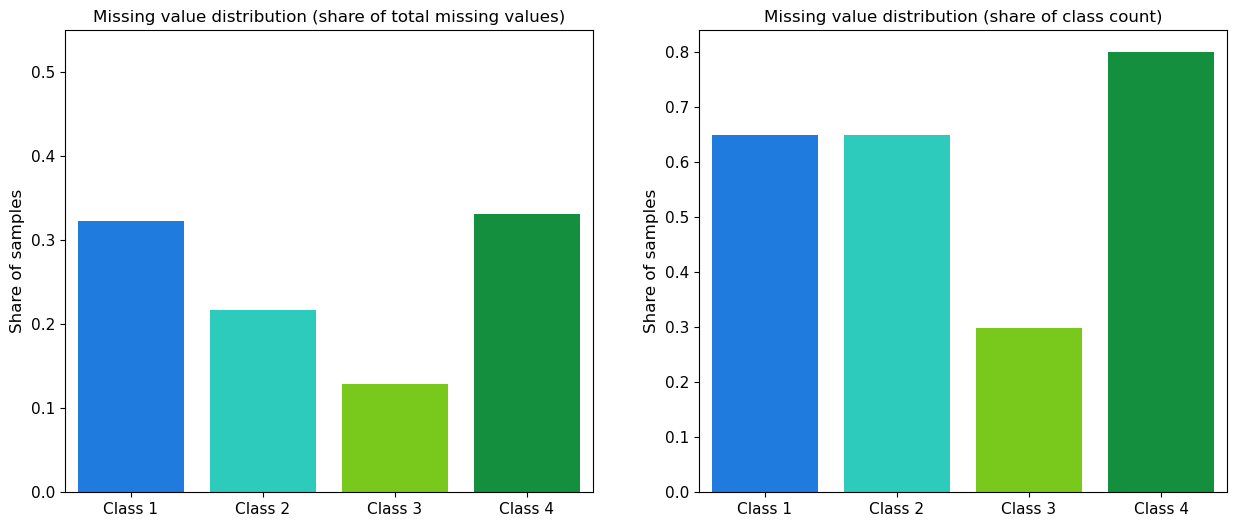

In [5]:
class_counts_raw = df_raw_dataset['class'].value_counts(normalize=False).sort_index()
class_counts_dropna = df_dropna['class'].value_counts(normalize=False).sort_index()

num_missing_values = class_counts_raw - class_counts_dropna
print(f"Number of missing values per class:\n{num_missing_values.to_string()}")


plt.figure(figsize=(15, 6))
colors_classes = ["#0079FF", "#12E6D0", "#7BE600", "#00A336"]

plt.subplot(1, 2, 1)
sns.barplot(x=[f'Class {i+1}' for i in range(num_classes)], y=num_missing_values/sum(num_missing_values), palette=colors_classes)
plt.title('Missing value distribution (share of total missing values)', fontsize=12)
plt.ylabel('Share of samples', fontsize=12)
plt.ylim(0, 0.55)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

plt.subplot(1, 2, 2)
missing_values_distribution = num_missing_values/class_counts_raw
sns.barplot(x=[f'Class {i+1}' for i in range(num_classes)], y=missing_values_distribution, palette=colors_classes)
plt.title('Missing value distribution (share of class count)', fontsize=12)
plt.ylabel('Share of samples', fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

path = 'results/Q2/2a/missing_value_distribution.png'
plt.savefig(path, dpi=300, bbox_inches='tight')

plt.show()

#### Generate more missing values according to the distribution

Total number of samples, after removing more missing values: 988
Distribution of samples, after removing more missing values:
1    0.185223
2    0.124494
3    0.639676
4    0.050607
Number of samples per class, after removing more missing values:
1    183
2    123
3    632
4     50


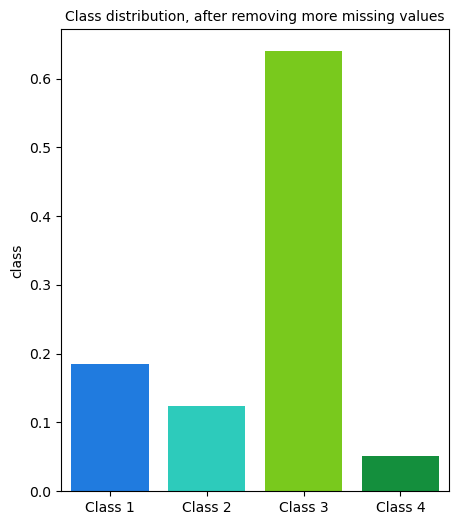

In [6]:
missing_values_distribution_values = missing_values_distribution.values 

# generate more missing values on the dropna dataset by randomly removing values
df_dropna_missing = df_dropna.copy()

for i in range(num_classes):
    rows_to_drop = df_dropna_missing[df_dropna_missing['class'] == i+1].sample(frac=missing_values_distribution_values[i]).index
    # print(f'Number of rows to drop from class {i+1}: {len(rows_to_drop)}')    
    # drop rows
    df_dropna_missing = df_dropna_missing.drop(rows_to_drop)
    # print(f'Number of rows left in class {i+1}: {len(df_dropna_missing[df_dropna_missing["class"] == i+1])}')
    # print()

# check new distribution
print(f"Total number of samples, after removing more missing values: {len(df_dropna_missing)}")
class_counts_dropna_missing = df_dropna_missing['class'].value_counts(normalize=True).sort_index()
print(f"Distribution of samples, after removing more missing values:\n{class_counts_dropna_missing.to_string()}")
print(f"Number of samples per class, after removing more missing values:\n{df_dropna_missing['class'].value_counts(normalize=False).sort_index().to_string()}")
class_counts_dropna_missing = df_dropna_missing['class'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(5, 6))
sns.barplot(x=[f'Class {i+1}' for i in range(num_classes)], y=class_counts_dropna_missing, palette=colors_classes)
plt.title('Class distribution, after removing more missing values', fontsize=10)

path = 'results/Q2/2a/new_class_distribution.png'
plt.savefig(path, dpi=300, bbox_inches='tight')

plt.show()

##### Perform classification on the dataset with missing values

In [7]:
X, y = df_dropna_missing.iloc[:,1:].values, df_dropna_missing.iloc[:,0].values

In [59]:
classifier_list = ['RF', 'KNN', 'LDA', 'LR', 'NB', 'SVM']

n_runs = 10

results_list = []

for run in range(n_runs):
    print(f"Run {run+1}/{n_runs}")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=run)
    
    # Without PCA
    (classifiers, predictions, 
     results) = generate_classifier_results(X_train, y_train, X_test, y_test, classifiers=classifier_list,
                                            average_setting='macro', visualize_cv=False, print_results=False)
    results_list.append(results)

Run 1/10
Optimized number of estimators: 250 

Optimized number of neighbors: 16 

Run 2/10
Optimized number of estimators: 350 

Optimized number of neighbors: 5 

Run 3/10
Optimized number of estimators: 200 

Optimized number of neighbors: 12 

Run 4/10
Optimized number of estimators: 300 

Optimized number of neighbors: 7 

Run 5/10
Optimized number of estimators: 200 

Optimized number of neighbors: 19 

Run 6/10
Optimized number of estimators: 200 

Optimized number of neighbors: 3 

Run 7/10
Optimized number of estimators: 200 

Optimized number of neighbors: 9 

Run 8/10
Optimized number of estimators: 250 

Optimized number of neighbors: 15 

Run 9/10
Optimized number of estimators: 250 

Optimized number of neighbors: 19 

Run 10/10
Optimized number of estimators: 200 

Optimized number of neighbors: 5 



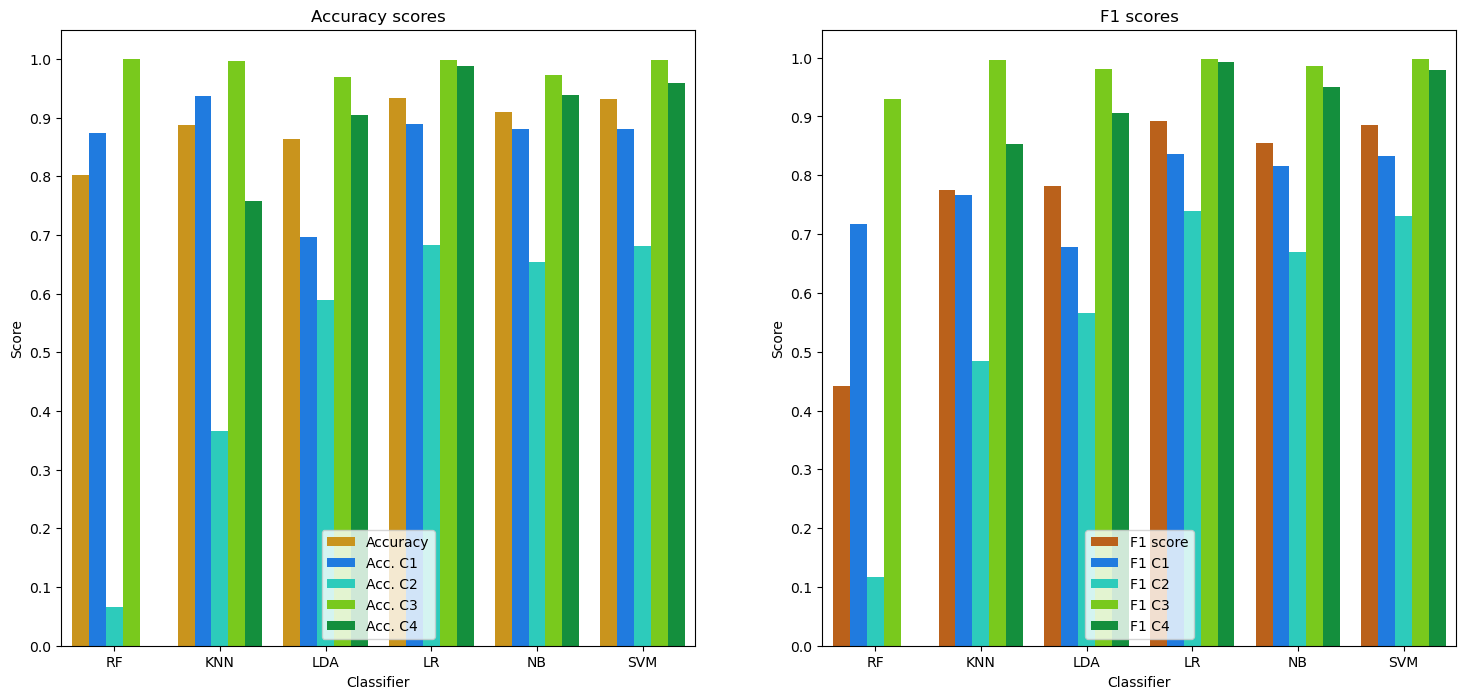

Standard deviations of the results
  Classifier  Accuracy   Acc. C1   Acc. C2   Acc. C3   Acc. C4  F1 score  \
0         RF  0.027704  0.044953  0.052577  0.000000  0.000000  0.033391   
1        KNN  0.018460  0.052538  0.068533  0.005108  0.148000  0.043769   
2        LDA  0.021001  0.093976  0.119656  0.011141  0.132333  0.039240   
3         LR  0.011834  0.053631  0.061422  0.002308  0.037500  0.016924   
4         NB  0.021067  0.058301  0.102895  0.008563  0.068665  0.032906   
5        SVM  0.011111  0.055754  0.062796  0.002308  0.052303  0.017465   

      F1 C1     F1 C2     F1 C3     F1 C4  
0  0.050703  0.088891  0.013372  0.000000  
1  0.038888  0.079047  0.003650  0.110250  
2  0.052807  0.071095  0.006649  0.096964  
3  0.029819  0.044579  0.002534  0.020000  
4  0.048919  0.075669  0.004422  0.048063  
5  0.025804  0.052542  0.001913  0.027817  


c:\Users\jespe\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam\code\classification_functions.py:171: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_summary.to_latex(path_name, index=False, bold_rows=True, float_format="%.3f", column_format='l|c|c|c|c|c|c|c|c|c|c')
c:\Users\jespe\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam\code\classification_functions.py:171: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_summary.to_latex(path_name, index=False, bold_row

In [60]:
path_name = 'results/Q2/2a/classifier_scores_'+str(n_runs)+'runs.png'
df_scores, df_std_devs = summarize_classifier_results_multiple_runs(classifiers, results_list, return_df=True, visualize=True, path_name=path_name)
path_name = 'results/Q2/2a/classifier_scores_'+str(n_runs)+'runs.tex'
save_classifier_results_as_table(path_name, df_scores)
print("Standard deviations of the results")
print(df_std_devs)
path_name_std = 'results/Q2/2a/classifier_scores_std_devs_'+str(n_runs)+'runs.tex'
save_classifier_results_as_table(path_name_std, df_std_devs)

## 2b) Imputing missing values

In [8]:
# import imputation methods
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

In [9]:
X_raw = df_raw_dataset.iloc[:,1:].values
y_raw = df_raw_dataset.iloc[:,0].values

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=1234)

In [10]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def transform_to_visualize(X, method='t-SNE'):
    if method == 't-SNE':
        tsne = TSNE(n_components=2, random_state=1234)
        X_transformed = tsne.fit_transform(X)
    elif method == 'PCA':
        pca = PCA(n_components=2, random_state=1234)
        X_transformed = pca.fit_transform(X)
    else:
        raise ValueError(f"Unknown method: {method}")
    return X_transformed

def visualize(X, y, colors_classes, method='t-SNE'):
    X_transformed = transform_to_visualize(X, method)
    
    plt.figure(figsize=(6, 6))
    plt.title(f'{method} visualization of the dataset', fontsize=12)
    sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue=y, palette=colors_classes)
    plt.xlabel(f'{method} component 1')
    plt.ylabel(f'{method} component 2')
    plt.show()

def visualize_classes(X, y, colors_classes, savepath=None):
    X_tsne = transform_to_visualize(X, 't-SNE')
    X_PCA = transform_to_visualize(X, 'PCA')

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.title('t-SNE visualization of the training set', fontsize=12)
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, s=75, palette=colors_classes)
    plt.xlabel('t-SNE component 1')
    plt.ylabel('t-SNE component 2')

    plt.subplot(1, 2, 2)
    plt.title('PCA visualization of the training set', fontsize=12)
    sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], hue=y, s=75, palette=colors_classes)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    
    if savepath is not None:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')

    plt.show()

In [11]:
def cv_optimize_knn_imputer(X_train, y_train, n_neighbors_list=np.arange(1, 23, 2), visualize_cv=False, print_results=False):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

    classifier_list_cv = ['LDA', 'LR', 'NB', 'SVM']

    cv_scores = []
    for n_neighbors in n_neighbors_list:
        print("n_neighbors:", n_neighbors)
        cv_scores_k = []
        for train_indices, test_indices in cv.split(X_train, y_train_raw):
            X_train_fold, y_train_fold = X_train[train_indices], y_train_raw[train_indices]
            X_test_fold, y_test_fold = X_train[test_indices], y_train_raw[test_indices]

            knn_imputer = KNNImputer(n_neighbors=n_neighbors)
            X_train_knn = knn_imputer.fit_transform(X_train_fold)
            X_test_knn = knn_imputer.transform(X_test_fold)
            (classifiers, predictions, 
            results) = generate_classifier_results(X_train_knn, y_train_fold, X_test_knn, y_test_fold, classifiers=classifier_list_cv,
                                                    average_setting='macro', visualize_cv=False, print_results=False)
            mean_f1_score_fold = np.mean(results['f1_scores'])
            cv_scores_k.append(mean_f1_score_fold)
        print("Mean f1 score:", np.mean(cv_scores_k)) if print_results else None
        cv_scores.append(np.mean(cv_scores_k))
    
    if visualize_cv:
        # visualize results
        plt.figure(figsize=(7, 6))
        plt.scatter(n_neighbors_list, cv_scores, marker='o')
        plt.title('KNNImputer: cross-validation', fontsize=12)
        plt.xlabel('Number of neighbors', fontsize=12)
        plt.ylabel('average f1 score (across classifiers)', fontsize=12)
        plt.xticks(n_neighbors_list, fontsize=11)
        plt.yticks(fontsize=11)
        plt.show()
    
    best_n_neighbors = n_neighbors_list[np.argmax(cv_scores)]
    return best_n_neighbors

#### Mean imputation

In [73]:
n_runs = 5
results_list = []
classifier_list = ['RF', 'KNN', 'LDA', 'LR', 'NB', 'SVM']

for run in range(n_runs):
    print(f"Run {run+1}/{n_runs}")
    
    X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=run)

    mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

    X_train_mean = mean_imputer.fit_transform(X_train)
    X_test_mean = mean_imputer.transform(X_test)

    # generate classifier results
    (classifiers, predictions, results) = generate_classifier_results(X_train_mean, y_train, X_test_mean, y_test, classifiers=classifier_list)
    
    results_list.append(results)

Run 1/5
Optimized number of estimators: 250 

Optimized number of neighbors: 2 

Run 2/5
Optimized number of estimators: 500 

Optimized number of neighbors: 2 

Run 3/5
Optimized number of estimators: 500 

Optimized number of neighbors: 2 

Run 4/5
Optimized number of estimators: 600 

Optimized number of neighbors: 2 

Run 5/5
Optimized number of estimators: 600 

Optimized number of neighbors: 2 



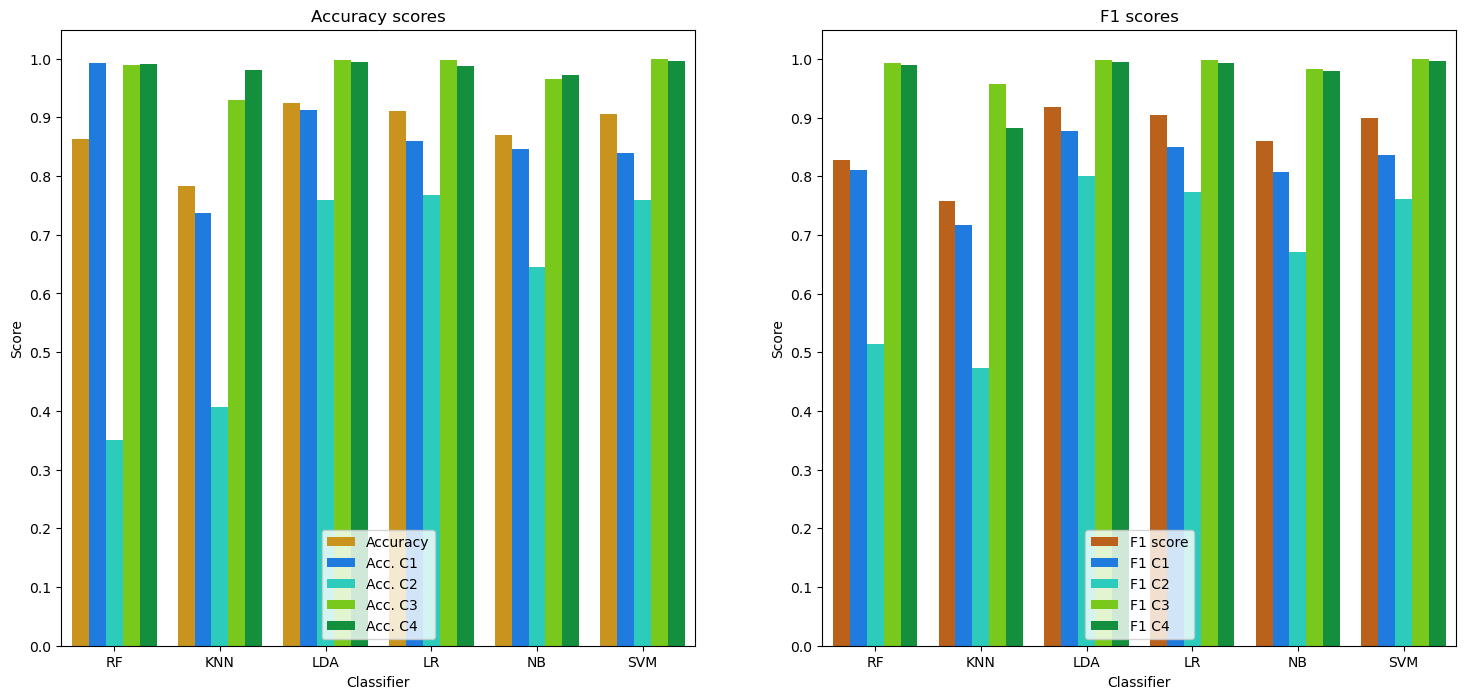

c:\Users\jespe\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam\code\classification_functions.py:171: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_results.to_latex(path_name, index=False, bold_rows=True, float_format="%.3f", column_format='l|c|c|c|c|c|c|c|c|c|c')


In [74]:
path = 'results/Q2/2b/classifier_scores_mean_imputer_'+str(n_runs)+'runs.png'
df_scores, df_std_devs = summarize_classifier_results_multiple_runs(classifiers, results_list, return_df=True,  visualize=True, path_name=path)
path = 'results/Q2/2b/classifier_scores_mean_imputer_'+str(n_runs)+'runs.tex'
save_classifier_results_as_table(path, df_scores)

#### KNN imputation

In [76]:
n_runs = 5
results_list = []
for run in range(n_runs):
    print(f"Run {run+1}/{n_runs}")
    
    X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=run)
    
    best_n_neighbors = cv_optimize_knn_imputer(X_train, y_train, visualize_cv=False, print_results=False)
    print("Best number of neighbors (imputer):", best_n_neighbors)
    
    knn_imputer = KNNImputer(n_neighbors=best_n_neighbors)
    X_train_knn = knn_imputer.fit_transform(X_train)
    X_test_knn = knn_imputer.transform(X_test)

    classifier_list = ['RF', 'KNN', 'LDA', 'LR', 'NB', 'SVM']

    (classifiers, predictions, results) = generate_classifier_results(X_train_knn, y_train, X_test_knn, y_test, classifiers=classifier_list)
    
    results_list.append(results)

Run 1/5
n_neighbors: 1
n_neighbors: 3
n_neighbors: 5
n_neighbors: 7
n_neighbors: 9
n_neighbors: 11
n_neighbors: 13
n_neighbors: 15
n_neighbors: 17
n_neighbors: 19
n_neighbors: 21
Optimized number of estimators: 600 

Optimized number of neighbors: 42 

Run 2/5
n_neighbors: 1
n_neighbors: 3
n_neighbors: 5
n_neighbors: 7
n_neighbors: 9
n_neighbors: 11
n_neighbors: 13
n_neighbors: 15
n_neighbors: 17
n_neighbors: 19
n_neighbors: 21
Optimized number of estimators: 300 

Optimized number of neighbors: 13 

Run 3/5
n_neighbors: 1
n_neighbors: 3
n_neighbors: 5
n_neighbors: 7
n_neighbors: 9
n_neighbors: 11
n_neighbors: 13
n_neighbors: 15
n_neighbors: 17
n_neighbors: 19
n_neighbors: 21
Optimized number of estimators: 550 

Optimized number of neighbors: 17 

Run 4/5
n_neighbors: 1
n_neighbors: 3
n_neighbors: 5
n_neighbors: 7
n_neighbors: 9
n_neighbors: 11
n_neighbors: 13
n_neighbors: 15
n_neighbors: 17
n_neighbors: 19
n_neighbors: 21
Optimized number of estimators: 450 

Optimized number of neig

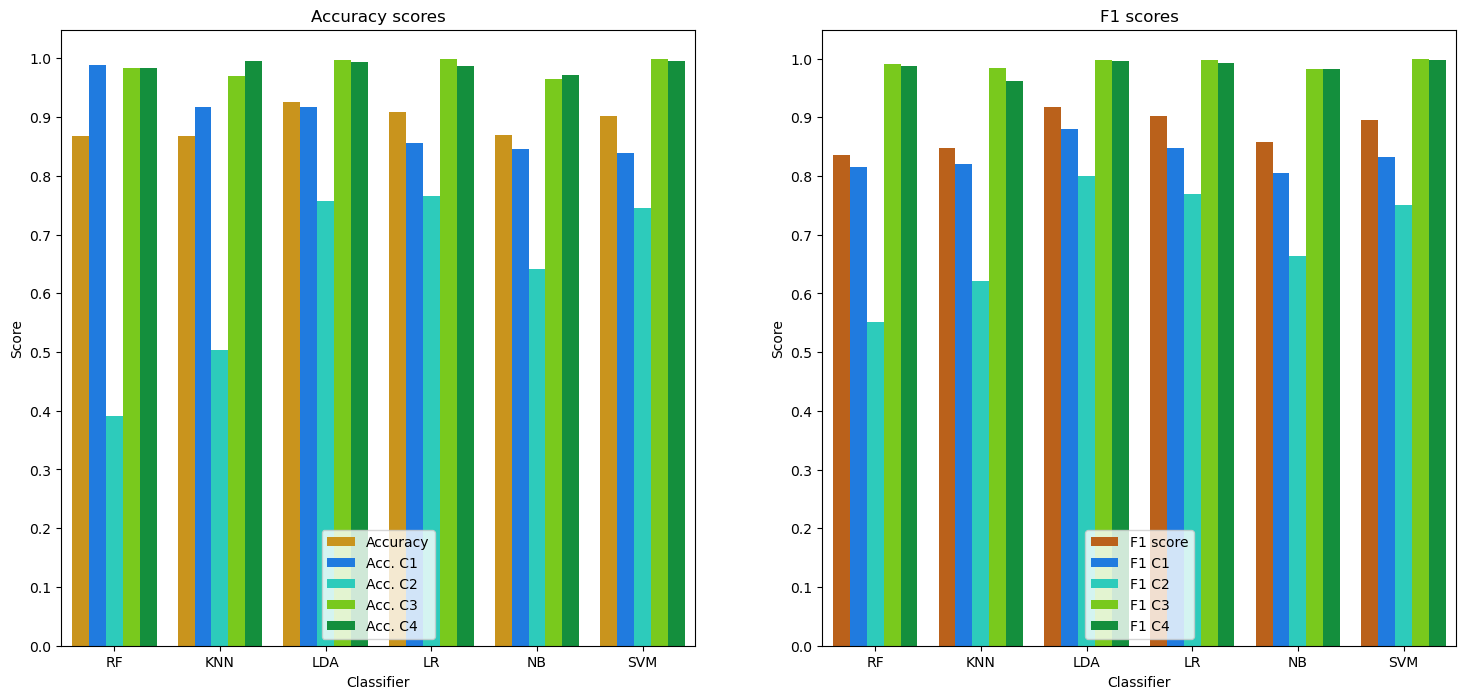

c:\Users\jespe\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam\code\classification_functions.py:171: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_results.to_latex(path_name, index=False, bold_rows=True, float_format="%.3f", column_format='l|c|c|c|c|c|c|c|c|c|c')


In [77]:
path = 'results/Q2/2b/classifier_scores_knn_imputer_'+str(n_runs)+'runs.png'
df_scores, df_std_devs = summarize_classifier_results_multiple_runs(classifiers, results_list, return_df=True,  visualize=True, path_name=path)
path = 'results/Q2/2b/classifier_scores_knn_imputer_'+str(n_runs)+'runs.tex'
save_classifier_results_as_table(path, df_scores)

Multivariate imputation using IterativeImputer

In [13]:
n_runs = 3
results_list = []

for run in range(n_runs):
    print(f"Run {run+1}/{n_runs}")
    
    X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=run)
    
    iterative_imputer = IterativeImputer(max_iter=10, random_state=1234, verbose=2)

    print("Fitting iterative imputer...")
    X_train_iterative = iterative_imputer.fit_transform(X_train_raw)
    print("Fit complete:", iterative_imputer.n_iter_, "iterations")
    X_test_iterative = iterative_imputer.transform(X_test_raw)

    classifier_list = ['RF', 'KNN', 'LDA', 'LR', 'NB', 'SVM']

    print("Generating classifier results...")
    (classifiers, predictions, results) = generate_classifier_results(X_train_iterative, y_train_raw, X_test_iterative, y_test_raw, classifiers=classifier_list)

    results_list.append(results)

Run 1/3
Fitting iterative imputer...
[IterativeImputer] Completing matrix with shape (4000, 1000)
[IterativeImputer] Ending imputation round 1/10, elapsed time 350.80
[IterativeImputer] Change: 156.56558463887177, scaled tolerance: 0.00652012895624764 
[IterativeImputer] Ending imputation round 2/10, elapsed time 700.67
[IterativeImputer] Change: 29.285166370519377, scaled tolerance: 0.00652012895624764 
[IterativeImputer] Ending imputation round 3/10, elapsed time 1077.78
[IterativeImputer] Change: 6.02162589536535, scaled tolerance: 0.00652012895624764 
[IterativeImputer] Ending imputation round 4/10, elapsed time 1451.74
[IterativeImputer] Change: 1.4037158575308588, scaled tolerance: 0.00652012895624764 
[IterativeImputer] Ending imputation round 5/10, elapsed time 1823.63
[IterativeImputer] Change: 0.3442437590573747, scaled tolerance: 0.00652012895624764 
[IterativeImputer] Ending imputation round 6/10, elapsed time 2193.26
[IterativeImputer] Change: 0.09059414659160374, scaled t

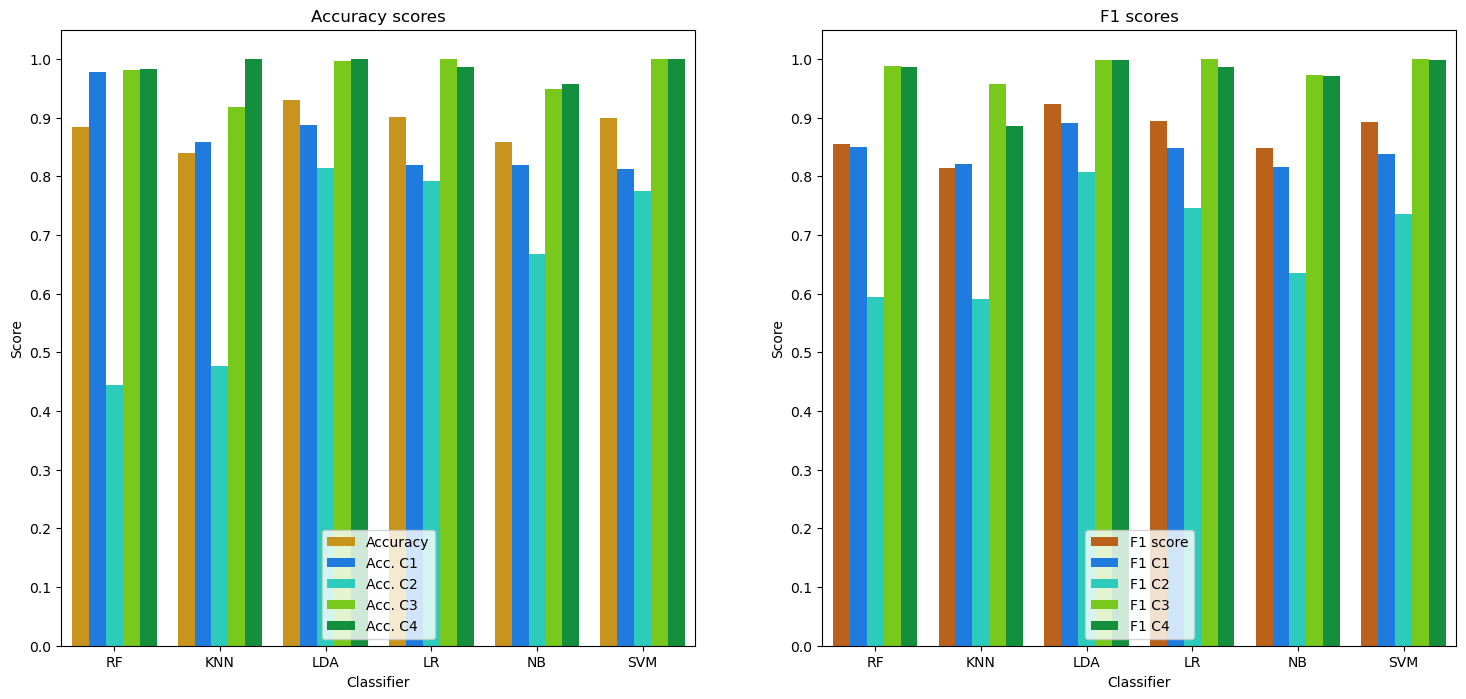

c:\Users\jespe\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam\code\classification_functions.py:171: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_results.to_latex(path_name, index=False, bold_rows=True, float_format="%.3f", column_format='l|c|c|c|c|c|c|c|c|c|c')


In [15]:
path = 'results/Q2/2b/classifier_scores_iter_imputer_'+str(n_runs)+'runs.png'
df_scores, df_std_devs = summarize_classifier_results_multiple_runs(classifiers, results_list, return_df=True,  visualize=True, path_name=path)
path = 'results/Q2/2b/classifier_scores_iter_imputer_'+str(n_runs)+'runs.tex'
save_classifier_results_as_table(path, df_scores)